# Analyse des Verhaltens von Benutzer TEST

Das Verhalten des definierten Benutzers wird nachfolgend im Kontext verschiedener Merkmale und Zeiträume betrachtet.

**Vermutlicher Status**
Student im Bachelor-Studiengang Wirtschaftsinformatik Online (BWINF)

### Definition des Benutzers

In [472]:
specified_user = 60

### Import von Bibliotheken und anderen Erweiterungen

In [473]:
from sqlalchemy import create_engine
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.core.display_functions import display

### Definitionen zur Darstellung der Visualisierungen

In [474]:
sns.set_theme(style='white', font_scale=1.2, palette='Spectral')

### Import der Originaldaten im CSV-Format (optional)

In [475]:
# file = 'vfh_moodle_ws20.csv'
# moodle_data = pd.read_csv(file, delimiter=';')
# moodle_data

### Herstellung der Verbindung zur MySQL-Datenbank

In [476]:
user = "root"
password = "root"
host = "localhost"
database = "vfh_moodle_ws20"
port = 3306

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', pool_recycle=port)
connection = engine.connect()

### Selektiver Import der Arbeitsdaten aus der MySQL-Datenbank

**Begrenzung der Selektion auf Studenten**

In [477]:
# Gegenstand der Untersuchungen sind nur Datensätze von Benutzern, die zuvor als Studenten identifiziert wurden.
query = """SELECT * FROM moodle_data WHERE userid = 60"""
moodle_data = pd.read_sql(query, connection) # Definition der Arbeitsdaten

# Konvertierung des Datentyps des Tabellenmerkmals timecreated
moodle_data['timecreated'] = pd.to_datetime(moodle_data['timecreated'], unit='s')

# Ausgabe der Arbeitsdaten
moodle_data

,courseid,Studiengang,userid,userstatus,relateduserid,relateduserstatus,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
0,0,0,60,student,0,none,loggedin,\core\event\user_loggedin,user,16741,2020-10-28 14:19:17,,0
1,0,0,60,student,60,student,viewed,\core\event\dashboard_viewed,,0,2020-10-28 14:19:18,,0
2,0,0,60,student,0,none,loggedout,\core\event\user_loggedout,user,16741,2020-10-28 14:23:28,,0
3,0,0,60,student,0,none,loggedin,\core\event\user_loggedin,user,16741,2020-11-03 02:27:35,,0
4,0,0,60,student,60,student,viewed,\core\event\dashboard_viewed,,0,2020-11-03 02:27:35,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,629,1,60,student,0,none,viewed,\mod_folder\event\course_module_viewed,folder,4225,2021-04-16 14:14:56,,0
294,0,0,60,student,60,student,viewed,\core\event\dashboard_viewed,,0,2021-04-16 14:15:28,,0
295,629,1,60,student,0,none,viewed,\core\event\course_viewed,,0,2021-04-16 14:15:34,,0
296,629,1,60,student,0,none,viewed,\mod_url\event\course_module_viewed,url,64407,2021-04-16 14:15:52,,0


In [478]:
display(moodle_data.timecreated[moodle_data.userid == specified_user])

0     2020-10-28 14:19:17
1     2020-10-28 14:19:18
2     2020-10-28 14:23:28
3     2020-11-03 02:27:35
4     2020-11-03 02:27:35
              ...        
293   2021-04-16 14:14:56
294   2021-04-16 14:15:28
295   2021-04-16 14:15:34
296   2021-04-16 14:15:52
297   2021-04-16 15:34:03
Name: timecreated, Length: 298, dtype: datetime64[ns]

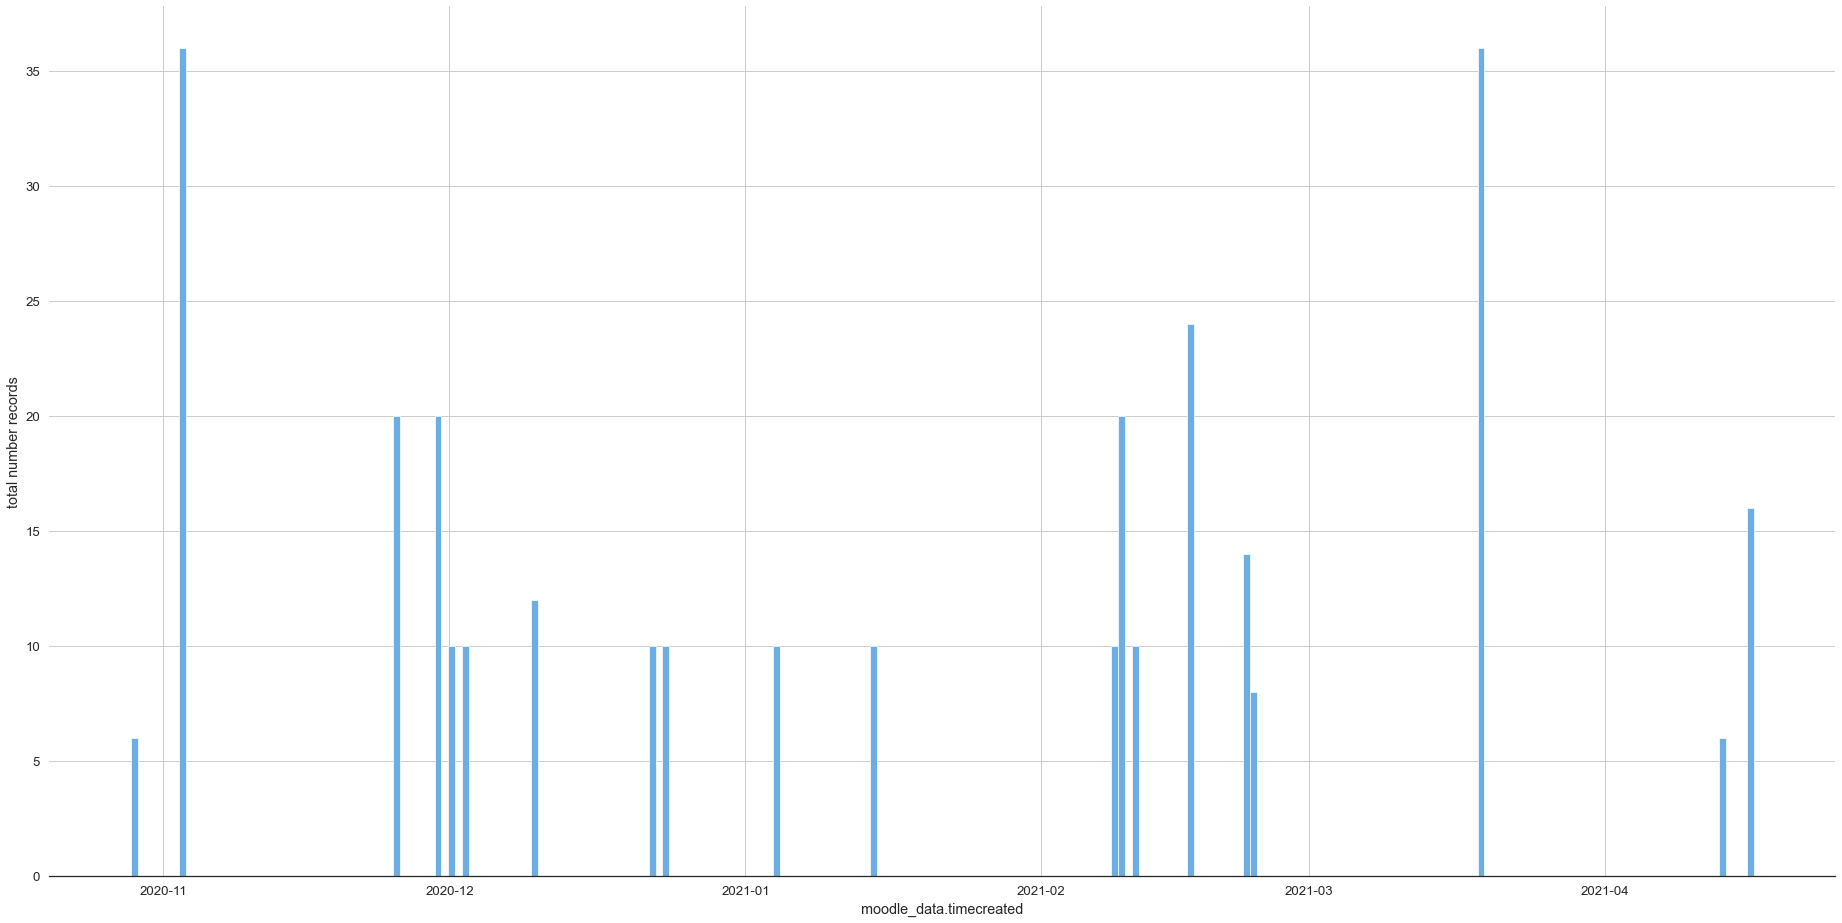

In [479]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 16)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge über 8 Monate (Gesamtzeitraum)
# chart = sns.histplot(data=moodle_data.timecreated, bins=8, color='#5FA4D2', alpha=1)

# Visualisierung der Menge der Log-Einträge über 34 Wochen (Gesamtzeitraum)
# chart = sns.histplot(data=moodle_data.timecreated[moodle_data.userid == specified_user], bins=34, color='#5FA4D2', alpha=1)

# Visualisierung der Menge der Log-Einträge über 235 Tage (Gesamtzeitraum)
chart = sns.histplot(data=moodle_data.timecreated[moodle_data.userid == specified_user], bins=235, color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.timecreated')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/Menge_der_Log-Eintraege_pro_Tag.pdf', format='pdf')
plt.show()

### Menge der unterschiedlichen Werte pro Tabellenmerkmal

In [480]:
attributes = moodle_data.nunique()
display(attributes)

courseid                2
Studiengang             2
userid                  1
userstatus              1
relateduserid           2
relateduserstatus       2
action                  5
eventname              11
objecttable             8
objectid               10
timecreated           136
course_module_type      1
instanceid              2
dtype: int64

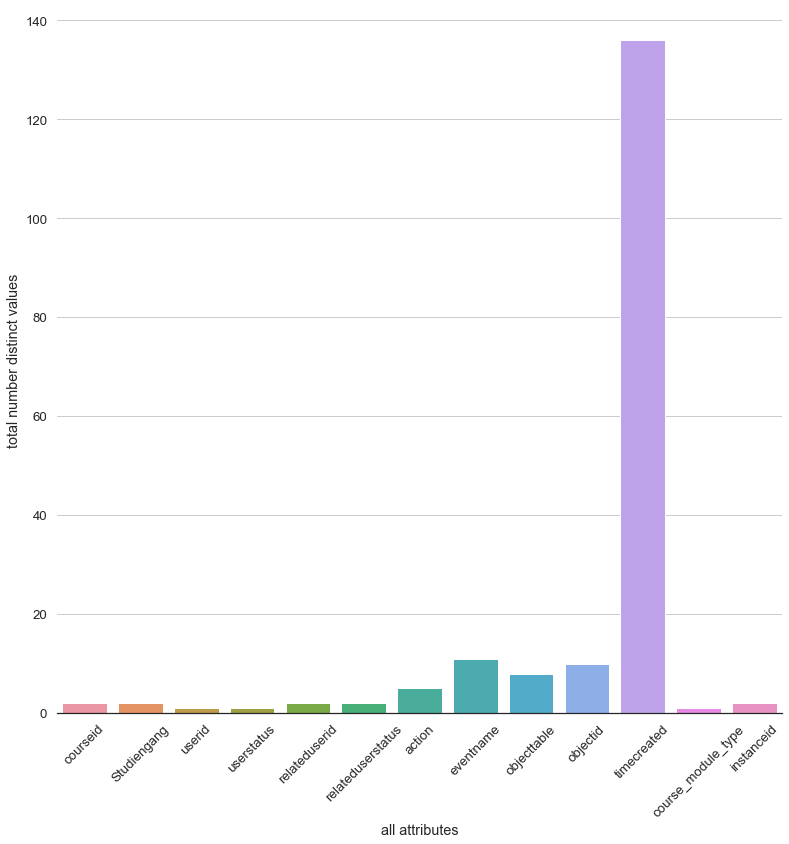

In [481]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(attributes.count(), attributes.count())) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der unterschiedlichen Werte pro Tabellenmerkmal
result = attributes
# Visualisierung der Menge der unterschiedlichen Werte pro Tabellenmerkmal
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('all attributes')
chart.set_ylabel('total number distinct values')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Studiengang

In [482]:
studies = moodle_data.Studiengang.groupby(moodle_data.Studiengang).count()
display(studies)

Studiengang
0    158
1    140
Name: Studiengang, dtype: int64

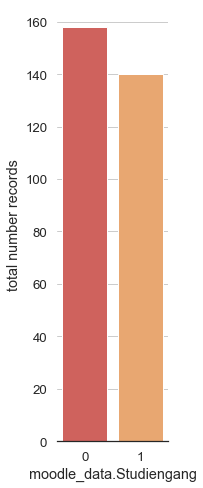

In [483]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(studies.count(), 8)) # Größe der Visualisierung (in inch)

# Ermittlung der Menge der Log-Einträge pro Studiengang
result = studies
# Visualisierung der Menge der Log-Einträge pro Studiengang
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.Studiengang')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Kurs

In [484]:
courses = moodle_data.courseid.groupby(moodle_data.courseid).count()
display(courses.sort_values())

courseid
629    140
0      158
Name: courseid, dtype: int64

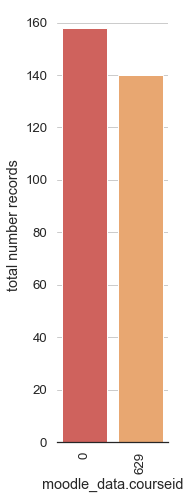

In [485]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(courses.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Kurs
result = courses
# Visualisierung der Menge der Log-Einträge pro Kurs
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.courseid')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Action

In [486]:
actions = moodle_data.action.groupby(moodle_data.action).count()
display(actions)

action
downloaded      4
loggedin       50
loggedout      48
submitted       4
viewed        192
Name: action, dtype: int64

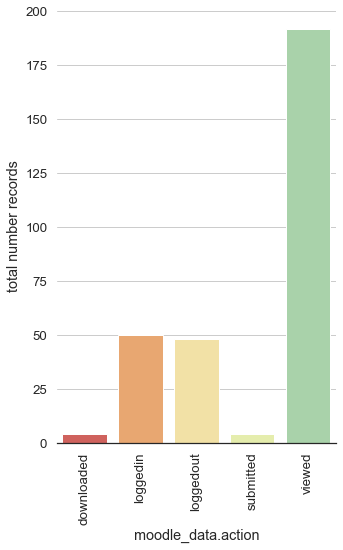

In [487]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(actions.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Action
result = actions
# Visualisierung der Menge der Log-Einträge pro Action
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.action')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Eventname

In [488]:
eventtypes = moodle_data.eventname.groupby(moodle_data.eventname).count()
display(eventtypes)

eventname
\core\event\course_viewed                   64
\core\event\dashboard_viewed                60
\core\event\user_loggedin                   50
\core\event\user_loggedout                  48
\mod_feedback\event\course_module_viewed     8
\mod_feedback\event\response_submitted       4
\mod_folder\event\all_files_downloaded       4
\mod_folder\event\course_module_viewed       6
\mod_forum\event\course_module_viewed        2
\mod_resource\event\course_module_viewed     6
\mod_url\event\course_module_viewed         46
Name: eventname, dtype: int64

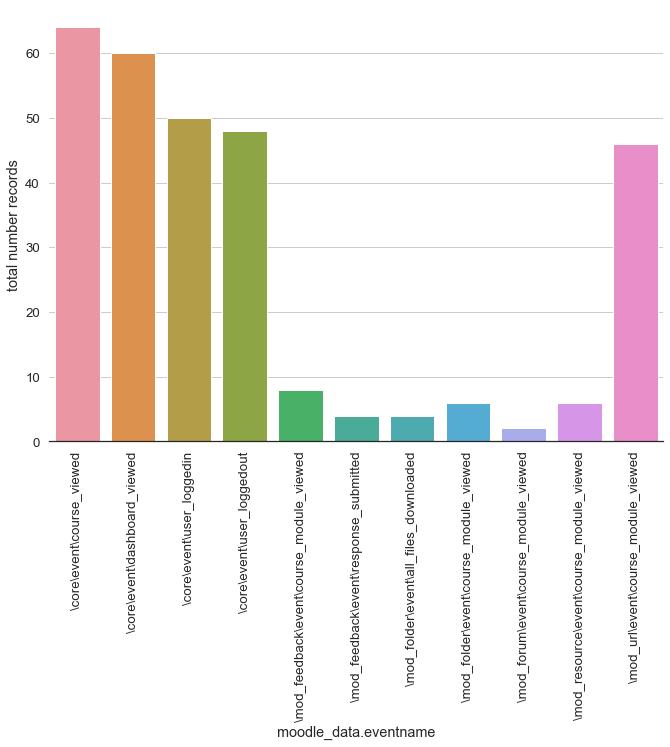

In [489]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(eventtypes.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Eventname
result = eventtypes
# Visualisierung der Menge der Log-Einträge pro Eventname
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.eventname')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Objecttable

In [490]:
objecttables = moodle_data.objecttable.groupby(moodle_data.objecttable).count()
display(objecttables)

objecttable
                      124
feedback                8
feedback_completed      4
folder                 10
forum                   2
resource                6
url                    46
user                   98
Name: objecttable, dtype: int64

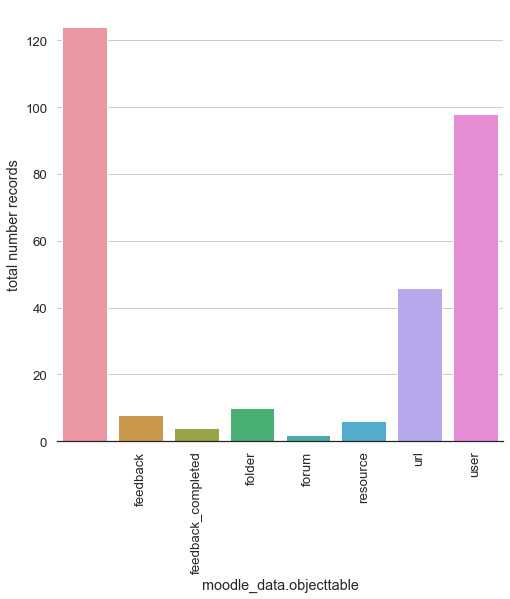

In [491]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(objecttables.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Objecttable
result = objecttables
# Visualisierung der Menge der Log-Einträge pro Objecttable
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.objecttable')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Coursemoduletype

In [492]:
course_module_types = moodle_data.course_module_type.groupby(moodle_data.course_module_type).count()
display(course_module_types)

course_module_type
    298
Name: course_module_type, dtype: int64

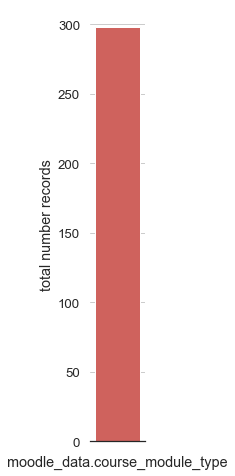

In [493]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(course_module_types.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Coursemoduletype
result = course_module_types
# Visualisierung der Menge der Log-Einträge pro Coursemoduletype
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.course_module_type')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Tagesstunde

In [494]:
# Ausgabe der Tagesstunden der protokollierten Log-Einträge
hours_per_day = moodle_data.timecreated.dt.hour.sort_values()
display(hours_per_day)

30      2
25      2
26      2
27      2
28      2
       ..
273    22
272    22
271    22
254    22
257    22
Name: timecreated, Length: 298, dtype: int64

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Tagesstunde**

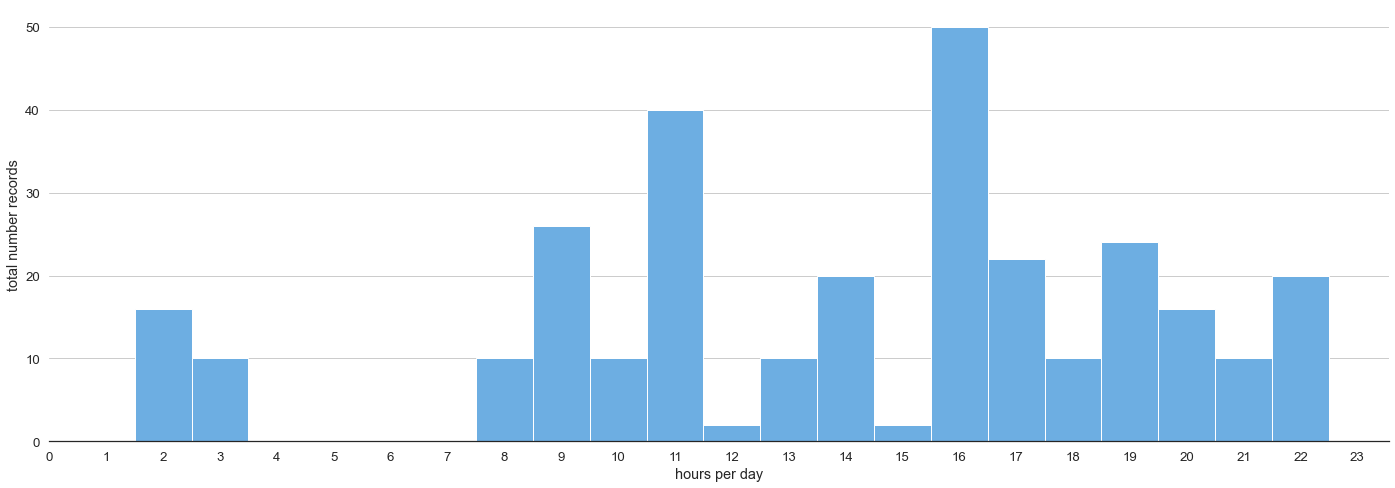

In [495]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Tagesstunde
chart = sns.histplot(hours_per_day, bins=24, discrete=True, color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Tagesstunde und Studiengang**

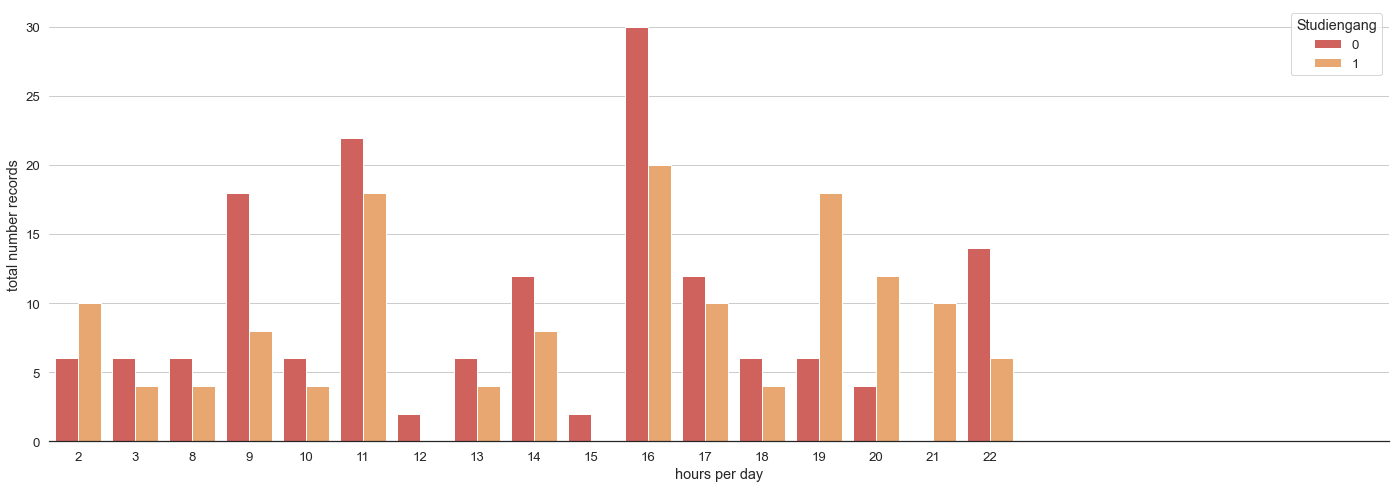

In [496]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Tagesstunde und Studiengang
chart = sns.countplot(x=hours_per_day, hue=moodle_data.Studiengang, hue_order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(title='Studiengang', labels=studies.index)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der kumulierten Mengen der Log-Einträge über alle Tagesstunden**

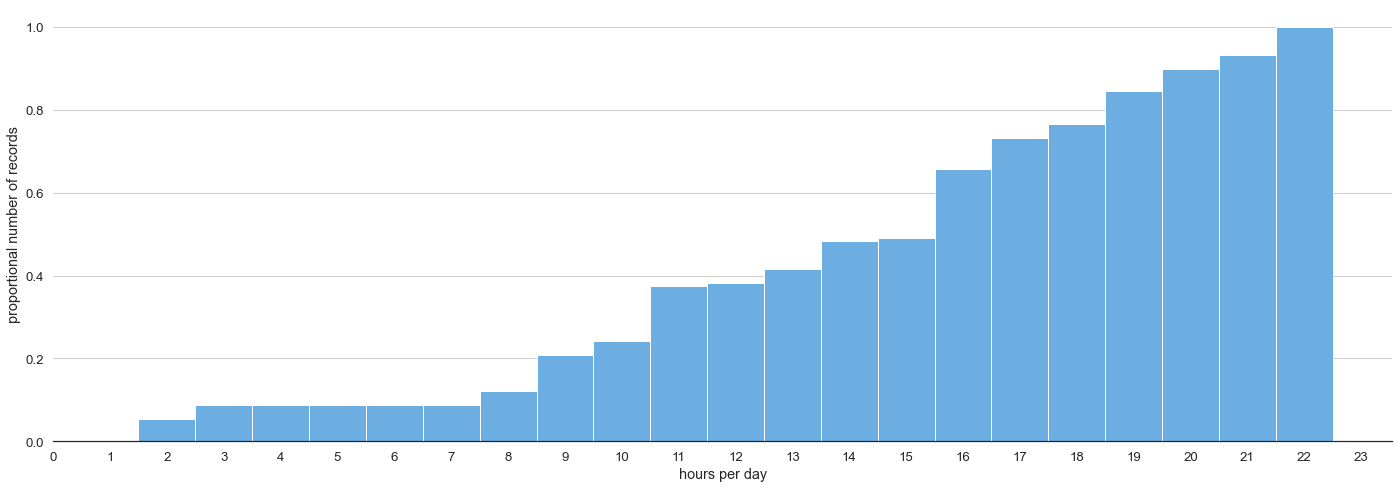

In [497]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8))  # Größe der Visualisierung (in inch)

# Visualisierung der kumulierten Mengen der Log-Einträge über alle Tagesstunden
chart = sns.histplot(hours_per_day, bins=24, discrete=True, cumulative=True, stat='proportion', color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('proportional number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Studiengang über alle Tagesstunden**

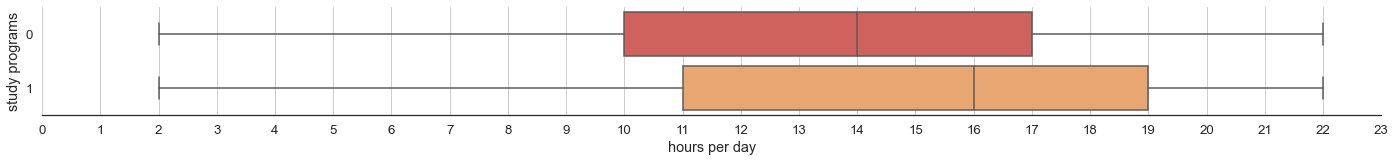

In [498]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, studies.count()))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Studiengang über alle Tagesstunden
chart = sns.boxplot(x=hours_per_day, y=moodle_data.Studiengang, order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('study programs')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Merkmal und Studiengang über alle Tagesstunden**

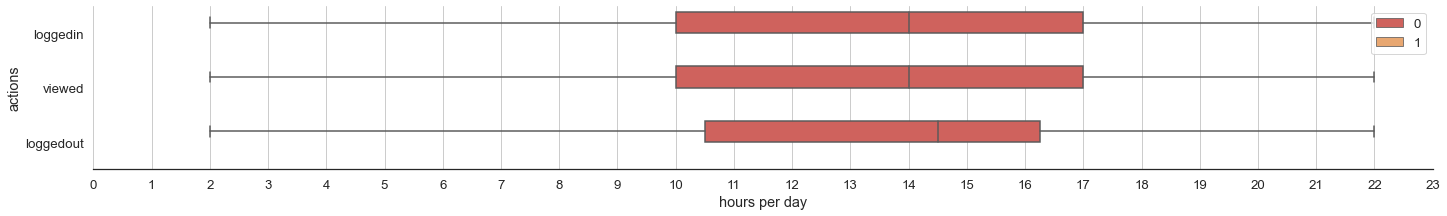

In [499]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, moodle_data.action[moodle_data.Studiengang.astype(int) == 0].nunique()))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Merkmal und Studiengang über alle Tagesstunden
chart = sns.boxplot(x=hours_per_day, y=moodle_data.action[moodle_data.Studiengang.astype(int) == 0], orient='h', hue=moodle_data.Studiengang, hue_order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('actions')
sns.despine(left=True)
plt.legend(loc='upper right')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Wochentag

In [500]:
# Ausgabe der Wochentage der protokollierten Log-Einträge
days_per_week = moodle_data.timecreated.dt.weekday.sort_values()
display(days_per_week)

122    0
118    0
117    0
116    0
115    0
      ..
63     6
64     6
65     6
73     6
71     6
Name: timecreated, Length: 298, dtype: int64

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Wochentag**

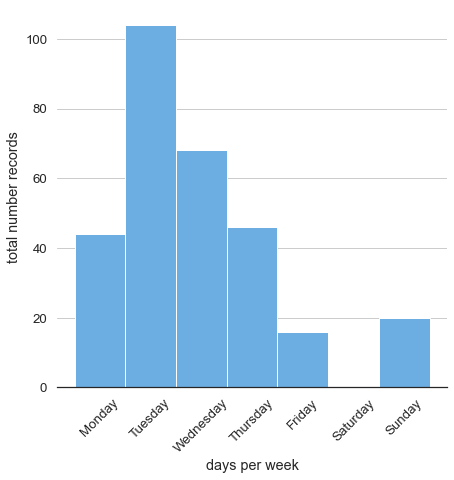

In [501]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(7, 7)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Wochentag
chart = sns.histplot(days_per_week, bins=7, discrete=True, color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Wochentag und Studiengang**

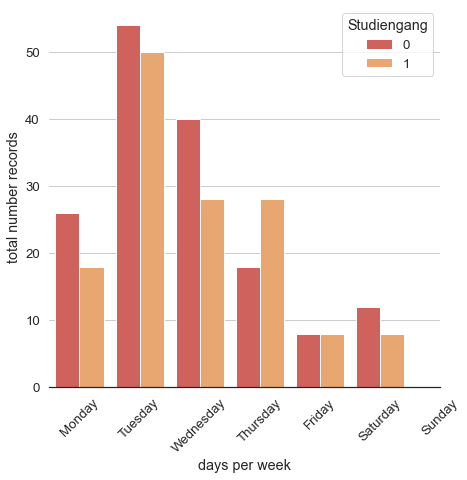

In [502]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(7, 7)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Wochentag und Studiengang
chart = sns.countplot(x=days_per_week, hue=moodle_data.Studiengang, hue_order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(title='Studiengang', labels=studies.index)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der kumulierten Mengen der Log-Einträge über alle Wochentage**

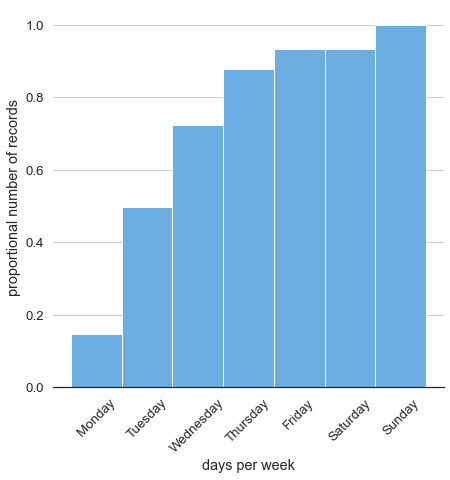

In [503]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(7, 7))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der kumulierten Mengen der Log-Einträge über alle Wochentage
chart = sns.histplot(days_per_week, bins=7, discrete=True, cumulative=True, stat='proportion', color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('proportional number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Studiengang über alle Wochentage**

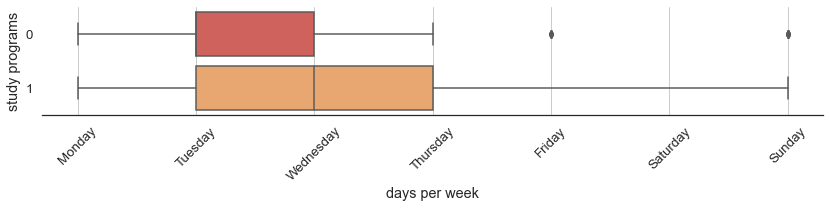

In [504]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, studies.count()))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Studiengang über alle Wochentage
chart = sns.boxplot(x=days_per_week, y=moodle_data.Studiengang, order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('study programs')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Merkmal und Studiengang über alle Wochentage**

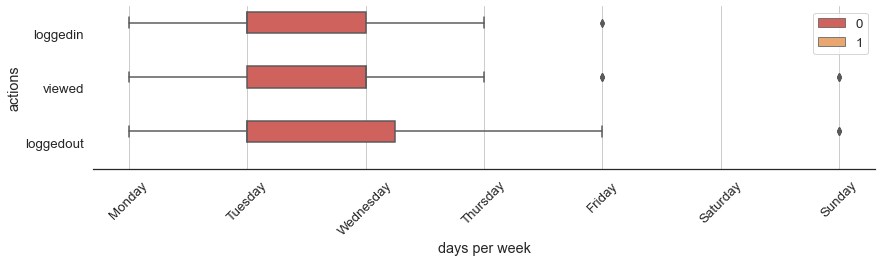

In [505]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, moodle_data.action[moodle_data.Studiengang.astype(int) == 0].nunique()))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Merkmal und Studiengang über alle Wochentage
chart = sns.boxplot(x=days_per_week, y=moodle_data.action[moodle_data.Studiengang.astype(int) == 0], orient='h', hue=moodle_data.Studiengang, hue_order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('actions')
sns.despine(left=True)
plt.legend(loc='upper right')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()